정규화를 해서 dt에 넣어보기 -> 모든 데이터를 0~1 사이의 값이 될 수 있또록
lead_time, avg_price_per_room -> cate ->  num으로 바꾸기


In [7]:
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree


In [12]:

train = pd.read_csv('kaggle_2.csv')
train.keys()

Index(['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights',
       'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'nights', 'lead_x_nights',
       'market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'room_type_reserved_Room_Type 1',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'required_car_parking_space_0', 'required_car_parking_space_1'

In [16]:
train = pd.read_csv('kaggle_2.csv')
train.keys()
print(train.head())

   no_of_adults  no_of_weekend_nights  no_of_week_nights  lead_time  \
0      0.076830              0.217818           0.570835   1.374933   
1      0.076830              0.217818           0.570835  -0.065390   
2      0.076830              0.217818           1.286130  -0.077294   
3      0.076830              1.369297          -1.575050  -0.279653   
4      1.617203             -0.933661           1.286130   1.386836   

   arrival_year  arrival_month  arrival_date  repeated_guest  \
0          2018       0.188557      1.535502               0   
1          2018      -1.444582      0.962366               0   
2          2018      -1.117954     -1.100922               0   
3          2017       0.841813     -1.330176               0   
4          2018       1.168441     -1.674057               0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  ...  \
0                     -0.063221                             -0.085991  ...   
1                     -0.063221 

In [18]:
'''
feature_names = ['no_of_adults', 'no_of_children',
'no_of_weekend_nights',
                 'no_of_week_nights', 'required_car_parking_space',
                 'lead_time', 'arrival_year', 'arrival_month',
                 'arrival_date', 'repeated_guest',
                 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                 'avg_price_per_room', 'no_of_special_requests',
                 'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
                 'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
                 'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
                 'Complementary', 'Online', 'Offline', 'Aviation']
'''

train = pd.read_csv('kaggle_2.csv')
feature_names = ['no_of_adults', 'no_of_weekend_nights', 'no_of_week_nights',
       'lead_time', 
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'nights', 'lead_x_nights',
       'market_segment_type_Aviation', 'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'room_type_reserved_Room_Type 1',
       'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3',
       'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5',
       'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'required_car_parking_space_0', 'required_car_parking_space_1']

# 87 프로 피쳐
# train = pd.read_csv('onehot_sample.csv')

# feature_names = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
#                  'no_of_week_nights', 'required_car_parking_space',
#                  'lead_time', 'arrival_year', 'arrival_month',
#                  'arrival_date', 'repeated_guest',
#                  'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
#                  'avg_price_per_room', 'no_of_special_requests',
#                  'meal_type_1', 'meal_type_2', 'meal_type_3', 'meal_type_4',
#                  'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4',
#                  'room_type_5', 'room_type_6', 'room_type_7', 'Corporate',
#                  'Complementary', 'Online', 'Offline', 'Aviation']
# dt_model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, criterion="gini", max_features = 30)

X = train[feature_names]
y = train["booking_status"]
# smote = SMOTE(random_state = 42)
# Decision Tree 학습/예측/평가
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Decision Tree 학습/예측/평가
dt_model = DecisionTreeClassifier(
    max_depth=15, min_samples_leaf=6, min_samples_split=2, criterion="gini")
scores = cross_val_score(dt_model, X, y, cv = 10)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.85866561 0.86221871 0.8621643  0.86018957 0.8542654  0.87045814
 0.84557662 0.86058452 0.8657188  0.86650869]
Average CV Score:  0.8606350361640251
Number of CV Scores used in Average:  10


In [66]:
print(X_train.shape)
print(X_train_over.shape)

(20313, 44)
(27434, 20)


In [7]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25, 20))
    _ = dt_model.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['No Disease', "Disease"],
                       filled=True)





params = {
    'max_depth' : [8, 10, 15, 20], 
    'min_samples_leaf' : [2, 4, 6, 8], 
    'min_samples_split' : [2, 4, 6, 8],
    'max_features' : [25, 30, 25, 40, 'sqrt'],
    'max_leaf_nodes' : [15, 20, 25, 30, 35]
}

# params = {
#     'max_leaf_nodes' : [25, 30, 35, 40, 45]
# }

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt_model,
                           param_grid=params,
                           cv=10, n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)
score_df = pd.DataFrame(grid_search.cv_results_)
# score_df.to_csv('dt_model_grid_search.csv')
score_df.nlargest(5, "mean_test_score")


Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


KeyboardInterrupt: 

In [5]:

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=15, max_features=40, min_samples_leaf=6)

In [77]:
plt.figure(figsize=(20, 15))
plot_tree(dt_model, filled=True, feature_names=X_train.keys())
plt.show()


KeyboardInterrupt: 

In [19]:
plt.figure(figsize=(20, 14))
plot_tree(dt_model, max_depth=2, filled=True,
          feature_names=X_train.keys())
plt.show()


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 2000x1400 with 0 Axes>

Feature Importances:
[0.021 0.001 0.033 0.033 0.    0.001 0.147 0.118 0.007 0.011 0.01  0.004
 0.    0.    0.    0.135 0.01  0.    0.    0.113 0.012 0.001 0.001 0.001
 0.    0.002 0.004 0.009 0.008 0.014 0.031 0.082 0.103 0.078 0.001 0.
 0.001 0.    0.    0.005 0.    0.    0.    0.   ]

no_of_adults: 0.021
no_of_children: 0.001
no_of_weekend_nights: 0.033
no_of_week_nights: 0.033
no_of_previous_cancellations: 0.000
no_of_previous_bookings_not_canceled: 0.001
avg_price_per_room: 0.147
no_of_special_requests: 0.118
type_of_meal_plan__1: 0.007
type_of_meal_plan__2: 0.011
required_car_parking_space__1: 0.010
room_type_reserved__1: 0.004
room_type_reserved__2: 0.000
room_type_reserved__3: 0.000
room_type_reserved__4: 0.000
market_segment_type__1: 0.135
market_segment_type__2: 0.010
market_segment_type__4: 0.000
repeated_guest__1: 0.000
avg_price_per_room/: 0.113
lead_time__lead_time__2: 0.012
lead_time__lead_time__3: 0.001
lead_time__lead_time__4: 0.001
lead_time__lead_time__5: 0.001
lead_t

<AxesSubplot:>

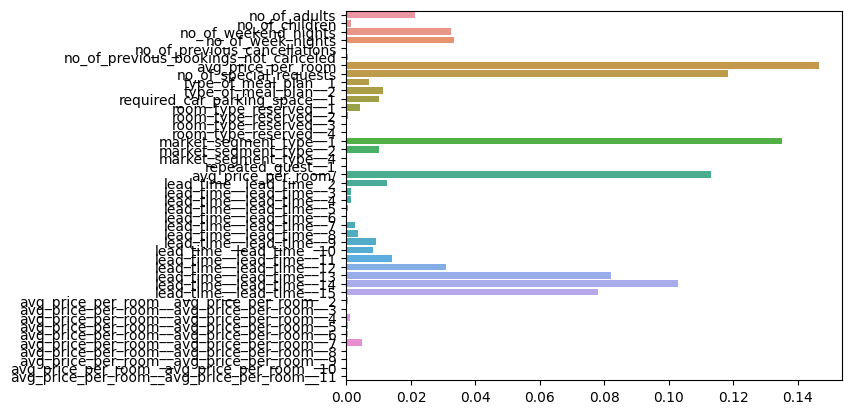

In [70]:
import numpy as np
import seaborn as sb

# feature importance 추출
print("Feature Importances:\n{0}\n".format(
    np.round(dt_model.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(X_train.keys(), dt_model.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))

# feature importance 시각화
sb.barplot(x=dt_model.feature_importances_, y=X_train.keys())


In [8]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(
        y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(
        y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

y_pred = dt_model.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
evaluate_model(dt_model)

Accuracy: 0.85
Train Accuracy : 0.8777630089105499
Train Confusion Matrix:
[[12761   925]
 [ 1558  5069]]
--------------------------------------------------
Test Accuracy : 0.8472140185075803
Test Confusion Matrix:
[[3100  328]
 [ 448 1203]]


In [30]:
from sklearn.preprocessing import OneHotEncoder

real_test = pd.read_csv('test.csv')

ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
train_cat = ohe.fit_transform(real_test[['type_of_meal_plan']])
train_cat = pd.DataFrame(train_cat)
real_test['meal_type_1'] = train_cat.loc[:, 0]
real_test['meal_type_2'] = train_cat.loc[:, 1]
real_test['meal_type_3'] = train_cat.loc[:, 2]
real_test['meal_type_4'] = train_cat.loc[:, 3]

ohe = OneHotEncoder(sparse=False)
# fit_transform은 train에만 사용하고 test에는 학습된 인코더에 fit만 해야한다
train_cat = ohe.fit_transform(real_test[['room_type_reserved']])
train_cat = pd.DataFrame(train_cat)
real_test['room_type_1'] = train_cat.loc[:, 0]
real_test['room_type_2'] = train_cat.loc[:, 1]
real_test['room_type_3'] = train_cat.loc[:, 2]
real_test['room_type_4'] = train_cat.loc[:, 3]
real_test['room_type_5'] = train_cat.loc[:, 4]
real_test['room_type_6'] = train_cat.loc[:, 5]
real_test['room_type_7'] = train_cat.loc[:, 6]

train_cat = ohe.fit_transform(real_test[['market_segment_type']])
train_cat = pd.DataFrame(train_cat)
real_test['Corporate'] = train_cat.loc[:, 0]
real_test['Complementary'] = train_cat.loc[:, 1]
real_test['Online'] = train_cat.loc[:, 2]
real_test['Offline'] = train_cat.loc[:, 3]
real_test['Aviation'] = train_cat.loc[:, 4]


for i in range(len(real_test)):
    if 17.0 > real_test.loc[i, 'lead_time']:
        real_test.loc[i, 'lead_time_under_iqr_1'] = 1
    else:
        real_test.loc[i, 'lead_time_under_iqr_1'] = 0
    if 17.0 <= real_test.loc[i, 'lead_time'] < 58.0:
        real_test.loc[i, 'lead_time_under_iqr_2'] = 1
    else:
        real_test.loc[i, 'lead_time_under_iqr_2'] = 0
    if 58.0 <= real_test.loc[i, 'lead_time'] < 127.0:
        real_test.loc[i, 'lead_time_under_iqr_3'] = 1
    else:
        real_test.loc[i, 'lead_time_under_iqr_3'] = 0
    if 127.0 <= real_test.loc[i, 'lead_time']:
        real_test.loc[i, 'lead_time_under_iqr_4'] = 1
    else:
        real_test.loc[i, 'lead_time_under_iqr_4'] = 0

for i in range(len(real_test)):
    if 80.7 > real_test.loc[i, 'avg_price_per_room']:
        real_test.loc[i, 'price_under_iqr_1'] = 1
    else:
        real_test.loc[i, 'price_under_iqr_1'] = 0
    if 80.7 <= real_test.loc[i, 'avg_price_per_room'] < 99.8:
        real_test.loc[i, 'price_under_iqr_2'] = 1
    else:
        real_test.loc[i, 'price_under_iqr_2'] = 0
    if 99.8 <= real_test.loc[i, 'avg_price_per_room'] < 120.1:
        real_test.loc[i, 'price_under_iqr_3'] = 1
    else:
        real_test.loc[i, 'price_under_iqr_3'] = 0
    if 120.1 <= real_test.loc[i, 'avg_price_per_room']:
        real_test.loc[i, 'price_under_iqr_4'] = 1
    else:
        real_test.loc[i, 'price_under_iqr_4'] = 0
        
lead_time_norm = (real_test['lead_time'] - real_test['lead_time'].mean())/real_test['lead_time'].std()
price_norm = (real_test['avg_price_per_room'] - real_test['avg_price_per_room'].mean())/real_test['avg_price_per_room'].std()

real_test['lead_time_norm'] = lead_time_norm
real_test['price_norm'] = price_norm

real_test.to_csv('onehot_test.csv', index=False)



In [31]:
real_test.keys()

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'meal_type_1',
       'meal_type_2', 'meal_type_3', 'meal_type_4', 'room_type_1',
       'room_type_2', 'room_type_3', 'room_type_4', 'room_type_5',
       'room_type_6', 'room_type_7', 'Corporate', 'Complementary', 'Online',
       'Offline', 'Aviation', 'lead_time_under_iqr_1', 'lead_time_under_iqr_2',
       'lead_time_under_iqr_3', 'lead_time_under_iqr_4', 'price_under_iqr_1',
       'price_under_iqr_2', 'price_under_iqr_3', 'price_under_iqr_4',
       'lead_time_norm', 'price_norm'],
      dtype='object')

In [10]:
import numpy as np

real_test = pd.read_csv('test.csv')
real_test = real_test.drop(["arrival_year", "arrival_month", "arrival_date"], axis=1)

meal_plan = {"Meal Plan 1": 0, "Not Selected": 1, "Meal Plan 2": 2, "Meal Plan 3": 3}
real_test['type_of_meal_plan'] = real_test['type_of_meal_plan'].map(meal_plan)

room_type = {
    "Room_Type 1": 0,
    "Room_Type 4": 1,
    "Room_Type 6": 3,
    "Room_Type 2": 2,
    "Room_Type 5": 4,
    "Room_Type 7": 5,
    "Room_Type 3": 6
}
real_test['room_type_reserved'] = real_test['room_type_reserved'].map(room_type)

market_segment = {
    "Online": 1,
    "Offline": 0,
    "Corporate": 2,
    "Complementary": 4,
    "Aviation": 3
}
real_test['market_segment_type'] = real_test['market_segment_type'].map(market_segment)

category_cols = ["type_of_meal_plan", "required_car_parking_space", "room_type_reserved", "market_segment_type", "repeated_guest"]
for col in category_cols:
    display(real_test[col].value_counts())
    print("#" * 50)

real_test["market_segment_type"].replace({3:4}).value_counts()

category_cols = ["type_of_meal_plan", "required_car_parking_space", "room_type_reserved", "market_segment_type", "repeated_guest"]
X_log_1_dummy = []
for col in category_cols:
    if col == "type_of_meal_plan":
        col_values = real_test[col].replace(3, 2)
    elif col == "room_type_reserved":
        col_values = real_test[col].replace({6:4, 5:4})
    elif col == "market_segment_type":
        col_values = real_test[col].replace({3:4})
    else:
        col_values = real_test[col]
    X_log_1_dummy.append(
        pd.get_dummies(col_values, prefix=col, prefix_sep='__', drop_first=True)
    )
X_log_1_dummy = pd.concat(X_log_1_dummy, axis=1)
real_test = pd.concat([real_test.drop(category_cols, axis=1), X_log_1_dummy], axis=1)

real_test["lead_time"] = np.log1p(real_test["lead_time"])
real_test["avg_price_per_room/"] = real_test["avg_price_per_room"].apply(lambda x: 209 if x>209 else x) # 나머지 99% 외의 나머지는 209로

real_test["lead_time__cut"] = pd.cut(real_test["lead_time"], 15, labels=[f"lead_time__{i}" for i in range(1,16)])
real_test["avg_price_per_room__cut"] = pd.cut(real_test["avg_price_per_room"], 11, labels=[f"avg_price_per_room__{i}" for i in range(1,12)])

real_test_dummy = [
    pd.get_dummies(real_test["lead_time__cut"], prefix="lead_time", prefix_sep='__', drop_first=True),
    pd.get_dummies(real_test["avg_price_per_room__cut"], prefix="avg_price_per_room", prefix_sep='__', drop_first=True)
]
real_test = pd.concat([real_test.drop(["lead_time", "lead_time__cut", "avg_price_per_room__cut"], axis=1)] + real_test_dummy, axis=1)
real_test.to_csv('kaggle_test.csv', index = False)

0    8343
1    1570
2     967
3       3
Name: type_of_meal_plan, dtype: int64

##################################################


0    10555
1      328
Name: required_car_parking_space, dtype: int64

##################################################


0    8446
1    1815
3     299
2     194
4      79
5      47
6       3
Name: room_type_reserved, dtype: int64

##################################################


1    7004
0    3130
2     590
4     119
3      40
Name: market_segment_type, dtype: int64

##################################################


0    10592
1      291
Name: repeated_guest, dtype: int64

##################################################


In [11]:
real_test = pd.read_csv('kaggle_test.csv')

feature_names = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan__1',
       'type_of_meal_plan__2', 'required_car_parking_space__1',
       'room_type_reserved__1', 'room_type_reserved__2',
       'room_type_reserved__3', 'room_type_reserved__4',
       'market_segment_type__1', 'market_segment_type__2',
       'market_segment_type__4', 'repeated_guest__1', 'avg_price_per_room/',
       'lead_time__lead_time__2', 'lead_time__lead_time__3',
       'lead_time__lead_time__4', 'lead_time__lead_time__5',
       'lead_time__lead_time__6', 'lead_time__lead_time__7',
       'lead_time__lead_time__8', 'lead_time__lead_time__9',
       'lead_time__lead_time__10', 'lead_time__lead_time__11',
       'lead_time__lead_time__12', 'lead_time__lead_time__13',
       'lead_time__lead_time__14', 'lead_time__lead_time__15',
       'avg_price_per_room__avg_price_per_room__2',
       'avg_price_per_room__avg_price_per_room__3',
       'avg_price_per_room__avg_price_per_room__4',
       'avg_price_per_room__avg_price_per_room__5',
       'avg_price_per_room__avg_price_per_room__6',
       'avg_price_per_room__avg_price_per_room__7',
       'avg_price_per_room__avg_price_per_room__8',
       'avg_price_per_room__avg_price_per_room__9',
       'avg_price_per_room__avg_price_per_room__10',
       'avg_price_per_room__avg_price_per_room__11']

test = real_test[feature_names]
y_pred = dt_model.predict(test)
print(y_pred)
sample = pd.DataFrame()
sample['Booking_ID'] = real_test['Booking_ID']
sample['booking_status'] = y_pred
sample.to_csv('sample.csv', index=False)
real_test.keys()


[0 0 0 ... 0 1 1]


Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'type_of_meal_plan__1',
       'type_of_meal_plan__2', 'required_car_parking_space__1',
       'room_type_reserved__1', 'room_type_reserved__2',
       'room_type_reserved__3', 'room_type_reserved__4',
       'market_segment_type__1', 'market_segment_type__2',
       'market_segment_type__4', 'repeated_guest__1', 'avg_price_per_room/',
       'lead_time__lead_time__2', 'lead_time__lead_time__3',
       'lead_time__lead_time__4', 'lead_time__lead_time__5',
       'lead_time__lead_time__6', 'lead_time__lead_time__7',
       'lead_time__lead_time__8', 'lead_time__lead_time__9',
       'lead_time__lead_time__10', 'lead_time__lead_time__11',
       'lead_time__lead_time__12', 'lead_time__lead_time__13',
       'lead_time__lead_time__14', 'lead_time__lead